In [1]:
infile = "examples/example22.txt"

In [2]:
def readInput22(infile):
    with open(infile) as f:
        blocks = []
        for l in f.read().strip().splitlines():
            e = l.split("~")
            block = []
            for c0,c1 in zip(e[0].split(","),e[1].split(",")):
                block.append(range(int(c0),int(c1)+1))
            blocks.append(block)
    return blocks

In [3]:
from collections import defaultdict

def block_to_space(block,space,value=1):
    rx,ry,rz = block
    for z in rz:
        for y in ry:
            for x in rx:
                space[(x,y,z)] = value

def fill_space(blocks):
    space = defaultdict(int)
    for i,b in enumerate(blocks):
        block_to_space(b,space,i+1)
    return space

In [4]:
infile = "examples/example22.txt"
blocks = readInput22(infile)
space = fill_space(blocks)
space

defaultdict(int,
            {(1, 0, 1): 1,
             (1, 1, 1): 1,
             (1, 2, 1): 1,
             (0, 0, 2): 2,
             (1, 0, 2): 2,
             (2, 0, 2): 2,
             (0, 2, 3): 3,
             (1, 2, 3): 3,
             (2, 2, 3): 3,
             (0, 0, 4): 4,
             (0, 1, 4): 4,
             (0, 2, 4): 4,
             (2, 0, 5): 5,
             (2, 1, 5): 5,
             (2, 2, 5): 5,
             (0, 1, 6): 6,
             (1, 1, 6): 6,
             (2, 1, 6): 6,
             (1, 1, 8): 7,
             (1, 1, 9): 7})

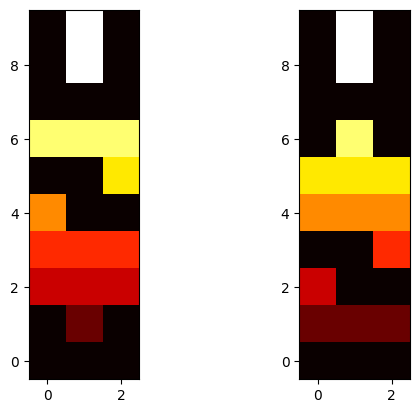

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def draw_projections(space,dims=(10,3)):
    XZ = np.zeros(dims)
    YZ = np.zeros(dims)
    for (x,y,z),v in space.items():
        if v:
            XZ[z,x] = v
            YZ[z,y] = v
    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(XZ,origin='lower',cmap="hot")
    ax2 = plt.subplot(1, 2, 2)
    ax2.imshow(YZ,origin='lower',cmap="hot")
    
draw_projections(space)

In [6]:
def drop_blocks(blocks,space,verbose=True):
    blocks_new = []
    for i in range(len(blocks)):
        if verbose: print("\nBlock",i+1,"trying to move...")
        b = blocks[i]
        while True:
            rx,ry,rz = b
            z0 = rz.start
            z1 = rz.stop
            if z0==1:
                if verbose: print("Block",i+1,"reached floor, stopping.")
                blocks_new.append(b)
                break
            # Try to drop block
            rznew = range(z0-1,z1-1) # new Z coordinates
            canDrop = True
            for z in rznew:
                for y in ry:
                    for x in rx:
                        if space[(x,y,z)] and not space[(x,y,z)]==i+1: # space already occupied
                            if verbose: print("Block",i+1,"cannot drop, stopping.")
                            canDrop = False
                            break
                    if not canDrop:
                        break
                if not canDrop:
                    break
            if not canDrop:
                blocks_new.append(b)
                break
            else:
                if verbose: print("Dropping...")
                bnew = [rx,ry,rznew]
                block_to_space(b,space,0)
                block_to_space(bnew,space,i+1)
                b = bnew

    return blocks_new

In [7]:
blocks_static = drop_blocks(blocks,space)


Block 1 trying to move...
Block 1 reached floor, stopping.

Block 2 trying to move...
Block 2 cannot drop, stopping.

Block 3 trying to move...
Dropping...
Block 3 cannot drop, stopping.

Block 4 trying to move...
Dropping...
Block 4 cannot drop, stopping.

Block 5 trying to move...
Dropping...
Dropping...
Block 5 cannot drop, stopping.

Block 6 trying to move...
Dropping...
Dropping...
Block 6 cannot drop, stopping.

Block 7 trying to move...
Dropping...
Dropping...
Dropping...
Block 7 cannot drop, stopping.


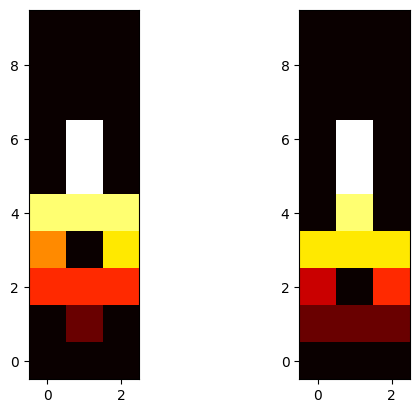

In [8]:
draw_projections(space,dims=(10,3))

In [9]:
def blocks_can_move(blocks):
    space = fill_space(blocks)
    for i,b in enumerate(blocks):
        canDrop = True
        rx,ry,rz = b
        while True:
            z0 = rz.start
            z1 = rz.stop
            if z0==1:
                canDrop = False
                break
            rznew = range(z0-1,z1-1)
            for z in rznew:
                for y in ry:
                    for x in rx:
                        if space[(x,y,z)] and not space[(x,y,z)]==i+1:
                            canDrop = False
                            break
                    if not canDrop:
                        break
                if not canDrop:
                    break
            if canDrop:
                return True
            else:
                break
    return False

In [10]:
blocks_can_move(blocks),blocks_can_move(blocks_static),

(True, False)

In [15]:
from copy import deepcopy

def part1(infile):
    blocks = readInput22(infile)
    space = fill_space(blocks)
    blocks_static = drop_blocks(blocks,space,verbose=False)

    can_be_disintegrated = 0
    for i in range(len(blocks_static)):
        blocks_test = deepcopy(blocks_static)
        block_removed = blocks_test.pop(i)
        can_be_disintegrated += not blocks_can_move(blocks_test)

    return can_be_disintegrated

In [16]:
part1("examples/example22.txt")

5

In [17]:
part1("AOC2023inputs/input22.txt")

0

In [18]:
infile = "AOC2023inputs/input22.txt"
blocks = readInput22(infile)
space = fill_space(blocks)

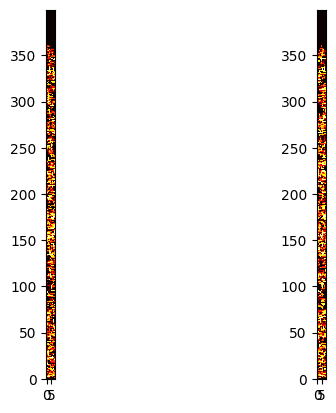

In [23]:
draw_projections(space,(400,10))